# Step 1

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from sklearn.preprocessing import PolynomialFeatures

# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)


In [19]:
np.random.seed(42)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1) 
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75]) 
 

In [126]:
noise = np.random.normal(0, 5, size=true_salaries.shape) 
Y = true_salaries + noise # variable with noise

In [128]:
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

# Step 3 (create linear regression model)

In [132]:
model=LinearRegression()


# step 4 training the linear regression model

In [134]:
# step 4 trainiing the linear regression model
model.fit(X,Y)

LinearRegression()

# step 5 slope and intercept of model

In [136]:
# step 5 slope and intercept of model
a=model.coef_[0]
b=model.intercept_
print("mode coefficient: ",a)
print("model intercept: ",b)

mode coefficient:  4.540488319373428
model intercept:  26.26320338040144


# Step 6 line equation

In [138]:
# Step 6 line equation
print(f"Equation of line : Y = {a:.2f}X + {b:.2f}")

Equation of line : Y = 4.54X + 26.26


# step 7 predicting values 

In [140]:
# step 7 predicting values 
Y_pred=model.predict(X)

In [142]:
# mean square error
mse=mean_squared_error(Y,Y_pred)
print(f"Mean square error is: {mse:.4f}")

Mean square error is: 16.5076


In [144]:
mae=mean_absolute_error(Y,Y_pred)
print(f"Mean absolute error is: {mae:.4f}")

Mean absolute error is: 3.1381


In [146]:
# root mean squared error
rmse=np.sqrt(mse)
print(f"Poot Mean Square error is: {rmse:.4f}")

Poot Mean Square error is: 4.0630


In [148]:
r2=r2_score(Y,Y_pred)
print(f"r2 Score is: {r2:.4f}")

r2 Score is: 0.9115


In [150]:
# adjusted r square
n=len(Y)
p=1
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-squared: {adj_r2:.4f}")


Adjusted R-squared: 0.9005


In [152]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     37.24
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           0.000186
Time:                        12:10:48   Log-Likelihood:                -28.062
No. Observations:                  10   AIC:                             62.12
Df Residuals:                       7   BIC:                             63.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.3548     

C:\Users\vani1\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


# step 8 lot the regression line

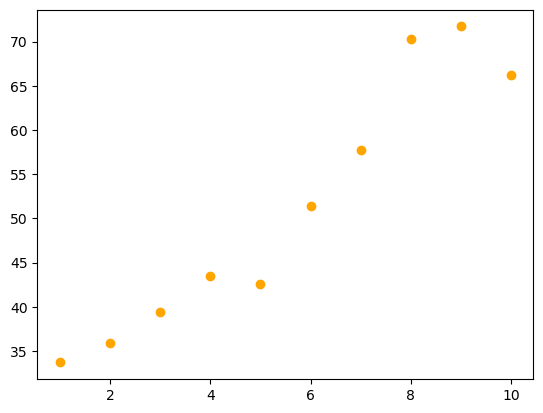

In [154]:
# step 8 lot the regression line
plt.scatter(X,Y,color='orange', label='Actual Line')

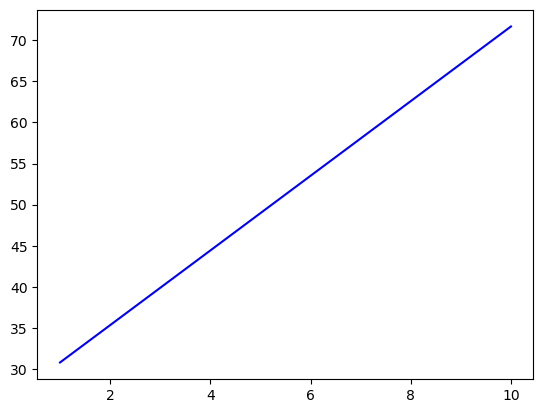

In [156]:
plt.plot(X,Y_pred,color='blue', label='best fit line')

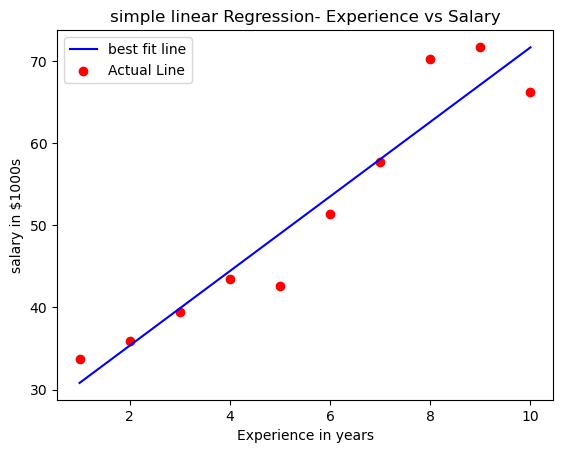

In [158]:
plt.plot(X,Y_pred,color='blue', label='best fit line')
plt.scatter(X,Y,color='red', label='Actual Line')
plt.xlabel('Experience in years')
plt.ylabel('salary in $1000s')
plt.title('simple linear Regression- Experience vs Salary')
plt.legend()
plt.show()

# step 9 predicting salary 

In [159]:
#step 9 predicting salary 
while True:
    try:
        exp=float(input("\nEnter years of experience to predict salary(or or -1 to exit)"))
        if exp==-1:
            break
        predicted_salary=model.predict(np.array([[exp]]))[0]
        print(f"Predicted Salary for {exp} years of experience: ${predicted_salary:.4f}K")
    except ValueError:
        print("Please enter a valid number")


Enter years of experience to predict salary(or or -1 to exit) -1
